# DIP Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Prereq Install

In [0]:
!pip install tensorflow==1.12.3
!pip install tensorflow-gpu==1.12.3

In [2]:
!pip install tensorflow==1.15.3
!pip install tensorflow-gpu==1.15.3

     |████████████████████████████████| 110.5MB 97kB/s 
     |████████████████████████████████| 3.8MB 39.1MB/s 
     |████████████████████████████████| 512kB 35.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=4c032eef9633296380650d66172e36955e2dc11f699551999af65d70b90e8306
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

## Imports

In [0]:
import numpy as np
import random
import os
import subprocess

import cv2
import matplotlib.pyplot as plt
import shutil

In [0]:
def PlotImgsInDir(dpath):
    for fname in os.listdir(dpath):
        fpath = os.path.join(dpath, fname)
        if os.path.splitext(fpath)[1] in ['.png', '.jpg', '.jpeg', '.bmp']:
            print(fname)
            plt.imshow(cv2.cvtColor(cv2.imread(fpath), cv2.COLOR_BGR2RGB))
            plt.show()

def GetImgsInDir(dpath):
    imgs = []
    for fname in os.listdir(dpath):
        fpath = os.path.join(dpath, fname)
        if os.path.splitext(fpath)[1] in ['.png', '.jpg', '.jpeg', '.bmp']:
            imgs.append(fpath)
    return imgs

In [0]:
# Delete All files in a folder
def DelAllFiles(dirpath):
    shutil.rmtree(dirpath)

# DelAllFiles('/content/checkpoint_dir/')
# DelAllFiles('/content/log_dir/')
# DelAllFiles('/content/logs_mmd/')
# DelAllFiles('/content/models/')
# DelAllFiles('/content/sample_dir/')
# DelAllFiles('/content/samples_mmd/')

In [0]:
def GetClassificationData():
    # Get the classified data
    class_data = open('/content/ClassificationData.txt', 'r+').read().split('\n')
    labels = class_data[0]
    class_data = class_data[1:]
    classes = []
    for line in class_data:
        splitUp = line.split(';')
        name = splitUp[0].split(':')[0]
        best_class = splitUp[0].split(':')[1]
        values = splitUp[1:]
        imgClass = ImageClassification(name, labels, values, best_class)
        classes.append(imgClass)
    return classes

In [0]:
def GetTargetClasses(path):
    # Find Original Classes of all files using their filenames
    Target_Classes = {}
    for fname in os.listdir(path):
        fpath = os.path.join(path, fname)
        if os.path.splitext(fpath)[1] in ['.png', '.jpg', '.jpeg', '.bmp']:
            original_class = 'Real'
            if fname.startswith('ProGAN'):
                original_class = 'ProGAN'
            elif fname.startswith('SNGAN'):
                original_class = 'SNGAN'
            elif fname.startswith('CramerGAN'):
                original_class = 'CramerGAN'
            elif fname.startswith('MMDGAN'):
                original_class = 'MMDGAN'
            Target_Classes[fname] = original_class
    return Target_Classes

## Testing GANs

### ProGAN

In [0]:
!pip install tensorflow==1.15.3
!pip install tensorflow-gpu==1.15.3

Generate Command and Execute

In [0]:
def ProGANGenerate(out_dir, n_gen_images, seed, exe=True):
    run_file_path = '/content/drive/"My Drive"/"DIP Project"/ProGAN/run.py'
    model_path = '/content/drive/My Drive/DIP Project/ProGAN/models/celeba_align_png_cropped.pkl'

    generator_cmd = 'python ' + run_file_path
    generator_cmd += ' --app "gen"'
    generator_cmd += ' --model_path "' + model_path + '"'
    generator_cmd += ' --out_image_dir "' + out_dir + '"'
    generator_cmd += ' --num_pngs ' + str(n_gen_images)
    generator_cmd += ' --gen_seed ' + str(seed)

    print(generator_cmd)

    if exe:
        subprocess.call(generator_cmd, shell=True)

In [0]:
!mkdir /content/out_ProGAN/

mkdir: cannot create directory ‘/content/out_ProGAN/’: File exists


In [0]:
out_dir = '/content/out_ProGAN/'
n_gen_images = 10
seed = 21

ProGANGenerate(out_dir, n_gen_images, seed)

Show Generated Images

ProGAN_00000000.png


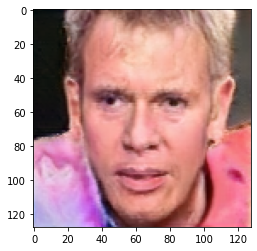

ProGAN_00000009.png


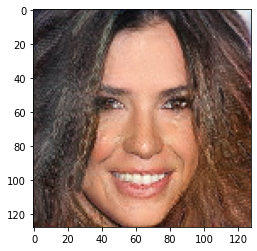

ProGAN_00000008.png


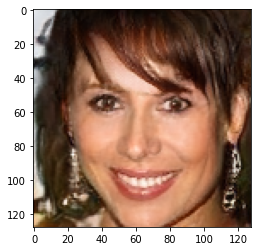

ProGAN_00000005.png


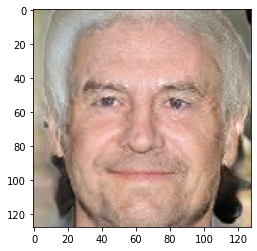

ProGAN_00000001.png


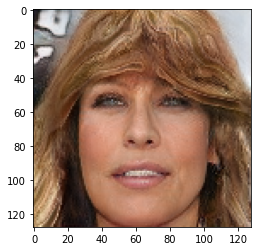

ProGAN_00000004.png


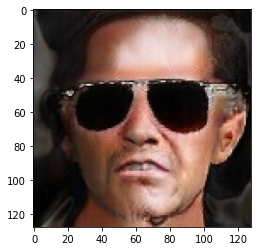

ProGAN_00000007.png


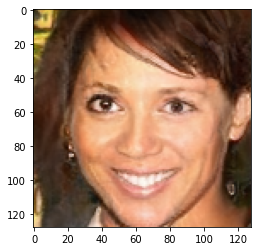

ProGAN_00000003.png


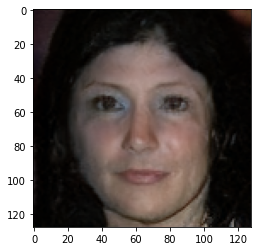

ProGAN_00000006.png


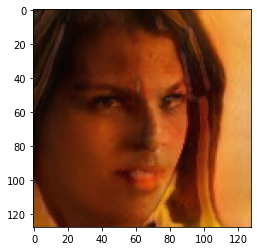

ProGAN_00000002.png


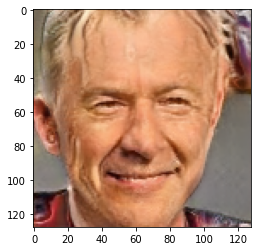

In [0]:
PlotImgsInDir(out_dir)

### SNGAN

In [0]:
# !pip install tensorflow
# !pip install tensorflow-gpu

Generate Command and Execute

In [0]:
def SNGANGenerate(results_dir, n_gen_images, seed, exe=True):
    run_file_path = '/content/drive/"My Drive"/"DIP Project"/SNGAN/evaluations/gen_images.py'
    config_path = '/content/drive/My Drive/DIP Project/SNGAN/configs/sn_projection_celeba.yml'
    snapshot = '/content/drive/My Drive/DIP Project/SNGAN/models/celeba_align_png_cropped.npz'

    generator_cmd = 'python ' + run_file_path
    generator_cmd += ' --config_path "' + config_path + '"'
    generator_cmd += ' --snapshot "' + snapshot + '"'
    generator_cmd += ' --results_dir "' + results_dir + '"'
    generator_cmd += ' --num_pngs ' + str(n_gen_images)
    generator_cmd += ' --seed ' + str(seed)

    print(generator_cmd)

    if exe:
        subprocess.call(generator_cmd, shell=True)

In [0]:
!mkdir /content/out_SNGAN/

In [0]:
results_dir = '/content/out_SNGAN/'
n_gen_images = 2
seed = 2

SNGANGenerate(results_dir, n_gen_images, seed)

In [0]:
# !python /content/drive/"My Drive"/"DIP Project"/SNGAN/evaluations/gen_images.py --config_path "/content/drive/My Drive/DIP Project/SNGAN/configs/sn_projection_celeba.yml" --snapshot "/content/drive/My Drive/DIP Project/SNGAN/models/celeba_align_png_cropped.npz" --results_dir "/content/out_SNGAN/" --num_pngs 2 --seed 2

/content/drive/My Drive/DIP Project/SNGAN/gen_models/resnet.py ResNetGenerator {'dim_z': 128, 'bottom_width': 4, 'ch': 64, 'n_classes': 1}
['/content/drive/My Drive/DIP Project/SNGAN/gen_models', '/content/drive/My Drive/DIP Project/SNGAN/evaluations', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/content/drive/My Drive/DIP Project/SNGAN/evaluations/../', '/content/drive/My Drive/DIP Project/SNGAN/evaluations/..', '../']
/content/drive/My Drive/DIP Project/SNGAN/gen_models resnet
/content/drive/My Drive/DIP Project/SNGAN/gen_models/resnet.py True
Generating png 0 / 2...
Generating png 1 / 2...


Show Generated Images

SNGAN_00000000.png


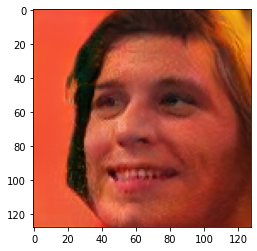

SNGAN_00000001.png


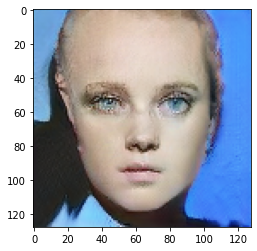

In [0]:
PlotImgsInDir(results_dir)

### CramerGAN

In [0]:
!pip install tensorflow==1.12.3
!pip install tensorflow-gpu==1.12.3

Generate Command and Execute

In [0]:
def CramerGANGenerate(output_dir_of_test_samples, n_gen_images, seed, exe=True):
    run_file_path = '/content/drive/"My Drive"/"DIP Project"/CramerGAN/gan/main.py'

    generator_cmd = 'python ' + run_file_path
    generator_cmd += ' --dataset celebA'
    generator_cmd += ' --data_dir "' + output_dir_of_test_samples + '"'
    generator_cmd += ' --checkpoint_dir models/'
    generator_cmd += ' --output_dir_of_test_samples "' + output_dir_of_test_samples + '"'
    generator_cmd += ' --no_of_samples ' + str(n_gen_images)
    generator_cmd += ' --model cramer --name cramer_gan'
    generator_cmd += ' --architecture g_resnet5 --output_size 128 --dof_dim 256'
    generator_cmd += ' --gradient_penalty 10.'
    generator_cmd += ' --MMD_lr_scheduler'
    generator_cmd += ' --random_seed ' + str(seed)

    print(generator_cmd)

    if exe:
        subprocess.call(generator_cmd, shell=True)

In [0]:
!mkdir /content/out_CramerGAN/

In [0]:
output_dir_of_test_samples = '/content/out_CramerGAN/'
n_gen_images = 2
seed = 2

CramerGANGenerate(output_dir_of_test_samples, n_gen_images, seed)

In [0]:
# !python /content/drive/"My Drive"/"DIP Project"/CramerGAN/gan/main.py --dataset celebA --data_dir "/content/out_ProGAN/" --checkpoint_dir models/ --output_dir_of_test_samples "/content/out_CramerGAN/" --no_of_samples 2 --model cramer --name cramer_gan --architecture g_resnet5 --output_size 128 --dof_dim 256 --gradient_penalty 10. --MMD_lr_scheduler --random_seed 2

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Show Generated Images

In [0]:
PlotImgsInDir(output_dir_of_test_samples)

### MMDGAN

In [0]:
!pip install tensorflow==1.12.3
!pip install tensorflow-gpu==1.12.3

Generate Command and Execute

In [0]:
def MMDGANGenerate(output_dir_of_test_samples, n_gen_images, seed, exe=True):
    run_file_path = '/content/drive/"My Drive"/"DIP Project"/MMDGAN/gan/main.py',

    generator_cmd = 'python ' + run_file_path
    generator_cmd += ' --dataset celebA'
    generator_cmd += ' --data_dir ../celeba_align_png_cropped/'
    generator_cmd += ' --checkpoint_dir models/'
    generator_cmd += ' --output_dir_of_test_samples "' + output_dir_of_test_samples + '"'
    generator_cmd += ' --no_of_samples ' + str(n_gen_images)
    generator_cmd += ' --model mmd --name mmd --kernel mix_rq_1dot'
    generator_cmd += ' --architecture g_resnet5 --output_size 128 --dof_dim 16'
    generator_cmd += ' --gradient_penalty 1. --L2_discriminator_penalty 1.'
    generator_cmd += ' --MMD_lr_scheduler'
    generator_cmd += ' --random_seed ' + str(seed)

    print(generator_cmd)

    if exe:
        subprocess.call(generator_cmd, shell=True)

In [0]:
!mkdir /content/out_MMDGAN/

In [0]:
output_dir_of_test_samples = '/content/out_MMDGAN/'
n_gen_images = 2
seed = 0

MMDGANGenerate(output_dir_of_test_samples, n_gen_images, seed)

In [0]:
# !python /content/drive/"My Drive"/"DIP Project"/MMDGAN/gan/main.py --dataset celebA --data_dir ../celeba_align_png_cropped/ --checkpoint_dir models/ --output_dir_of_test_samples "/content/out_MMDGAN/" --no_of_samples 2 --model mmd --name mmd --kernel mix_rq_1dot --architecture g_resnet5 --output_size 128 --dof_dim 16 --gradient_penalty 1. --L2_discriminator_penalty 1. --MMD_lr_scheduler --random_seed 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Show Generated Images

In [0]:
PlotImgsInDir(output_dir_of_test_samples)

## Classifier Testing

In [0]:
# !mkdir /content/out_classifier/
!mkdir /content/in_classifier/

In [0]:
run_file_path = '/content/drive/"My Drive"/"DIP Project"/classifier/run.py'
model_path = '/content/drive/My Drive/DIP Project/classifier/models/CelebA_ProGAN_SNGAN_CramerGAN_MMDGAN_128.pkl'
in_dir = '/content/out_ProGAN/'

Show Input Images

ProGAN_00000002.png


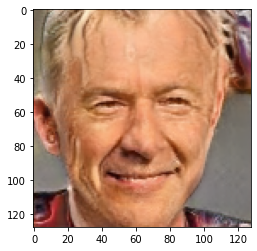

In [0]:
PlotImgsInDir(in_dir)

Generate Command and Execute

In [0]:
generator_cmd = 'python ' + run_file_path
generator_cmd += ' --app test'
generator_cmd += ' --model_path "' + model_path + '"'
generator_cmd += ' --testing_data_path "' + in_dir + '"'

print(generator_cmd)

python /content/drive/"My Drive"/"DIP Project"/classifier/run.py --app test --model_path "/content/drive/My Drive/DIP Project/classifier/models/CelebA_ProGAN_SNGAN_CramerGAN_MMDGAN_128.pkl" --testing_data_path "/content/out_ProGAN/"


In [0]:
subprocess.call(generator_cmd, shell=True)

1

In [0]:
!python /content/drive/"My Drive"/"DIP Project"/classifier/run.py --app test --model_path "/content/drive/My Drive/DIP Project/classifier/models/CelebA_ProGAN_SNGAN_CramerGAN_MMDGAN_128.pkl" --testing_data_path "/content/out_ProGAN/"

Initializing TensorFlow...




2020-06-04 10:01:13.562225: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Loading network...
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.










Traceback (most recent call last):
  File "/content/drive/My Drive/DIP Project/classifier/run.py", line 344, in <module>
    tfutil.call_func_by_name(**app)
  File "/content/drive/My Drive/DIP Project/classifier/tfutil.py", line 236, in call_func_by_name
    return import_obj(func)(*args, **kwargs)
  File "/content/drive/My Drive/DIP Project/classifier/util

## Classifier VisNet Testing

Generate Command and Execute

In [0]:
class ImageClassification:
    def __init__(self, name, labels, values, best_class):
        self.name = name
        self.labels = labels
        self.values = values
        self.best_class = best_class

In [0]:
def ClassifierVisNet(in_path, out_fingerprint_dir, exe=True):
    run_file_path = '/content/drive/"My Drive"/"DIP Project"/classifier_visNet/run.py'
    model_path = '/content/drive/My Drive/DIP Project/classifier_visNet/models/CelebA_ProGAN_SNGAN_CramerGAN_MMDGAN_128.pkl'

    generator_cmd = 'python ' + run_file_path
    generator_cmd += ' --app test'
    generator_cmd += ' --model_path "' + model_path + '"'
    generator_cmd += ' --testing_data_path "' + in_path + '"'
    generator_cmd += ' --out_fingerprint_dir "' + out_fingerprint_dir + '"'

    print(generator_cmd)

    if exe:
        subprocess.call(generator_cmd, shell=True)
        return GetClassificationData()
    else:
        return None

In [0]:
!mkdir /content/out_classifiervisnet/
!mkdir /content/in_classifiervisnet/

In [0]:
in_path = '/content/out_ProGAN/'
out_fingerprint_dir = '/content/out_classifiervisnet/'

ClassifierVisNet(in_path, out_fingerprint_dir)

In [0]:
# !python /content/drive/"My Drive"/"DIP Project"/classifier_visNet/run.py --app test --model_path "/content/drive/My Drive/DIP Project/classifier_visNet/models/CelebA_ProGAN_SNGAN_CramerGAN_MMDGAN_128.pkl" --testing_data_path "/content/out_ProGAN/" --out_fingerprint_dir "/content/out_classifiervisnet/"

### Visualise Output

In [0]:
def VisualiseFingerprintData(dirpath, imgName, classes, plot=True):
    print(imgName)

    imgNameFull = imgName
    imgName = os.path.splitext(imgNameFull)[0]

    # Classification Data Vis
    class_data = None
    for c in classes:
        if c.name == imgNameFull:
            class_data = ImageClassification(c.name, c.labels, c.values, c.best_class)
    
    if not plot:
        return class_data.best_class

    # Fingerprint Data Vis
    image_fingerprint = cv2.imread(dirpath + imgName + '_image_fingerprint.png')

    model_fingerprint_real = cv2.imread(dirpath + 'model_fingerprint_CelebA_real_data.png')
    model_fingerprint_ProGAN = cv2.imread(dirpath + 'model_fingerprint_ProGAN_generated_data.png')
    model_fingerprint_SNGAN = cv2.imread(dirpath + 'model_fingerprint_SNGAN_generated_data.png')
    model_fingerprint_CramerGAN = cv2.imread(dirpath + 'model_fingerprint_CramerGAN_generated_data.png')
    model_fingerprint_MMDGAN = cv2.imread(dirpath + 'model_fingerprint_MMDGAN_generated_data.png')

    model_response_fingerprint_real = cv2.imread(dirpath + imgName + '_image_fingerprint_responding_to_model_fingerprint_CelebA_real_data.png')
    model_response_fingerprint_ProGAN = cv2.imread(dirpath + imgName + '_image_fingerprint_responding_to_model_fingerprint_ProGAN_generated_data.png')
    model_response_fingerprint_SNGAN = cv2.imread(dirpath + imgName + '_image_fingerprint_responding_to_model_fingerprint_SNGAN_generated_data.png')
    model_response_fingerprint_CramerGAN = cv2.imread(dirpath + imgName + '_image_fingerprint_responding_to_model_fingerprint_CramerGAN_generated_data.png')
    model_response_fingerprint_MMDGAN = cv2.imread(dirpath + imgName + '_image_fingerprint_responding_to_model_fingerprint_MMDGAN_generated_data.png')

    model_fingerprints = [model_fingerprint_real, model_fingerprint_ProGAN, model_fingerprint_SNGAN, model_fingerprint_CramerGAN, model_fingerprint_MMDGAN]
    model_response_fingerprints = [model_response_fingerprint_real, model_response_fingerprint_ProGAN, model_response_fingerprint_SNGAN, model_response_fingerprint_CramerGAN, model_response_fingerprint_MMDGAN]

    # Image Fingerprint
    plt.subplot(3, 6, 7)
    plt.imshow(image_fingerprint)

    # Model Fingerprints
    for i in range(5):
        plt.subplot(3, 6, i+2)
        plt.imshow(model_fingerprints[i])

    # Model Response Fingerprints
    for i in range(5):
        plt.subplot(3, 6, 6+i+2)
        plt.imshow(model_response_fingerprints[i])

    plt.show()

    # Classification Plot
    values_percentages = np.array(class_data.values).astype(float)
    values_percentages = np.exp(values_percentages)
    # values_percentages = values_percentages * 100
    values_percentages = values_percentages / np.sum(values_percentages)
    plt.bar(['Real', 'ProGAN', 'SNGAN', 'CramerGAN', 'MMDGAN'], values_percentages)
    plt.show()
    print(values_percentages)
    print("Best Class:", class_data.best_class)
    return class_data.best_class

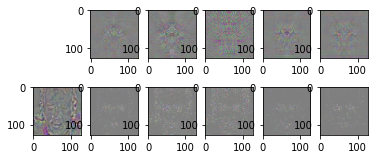

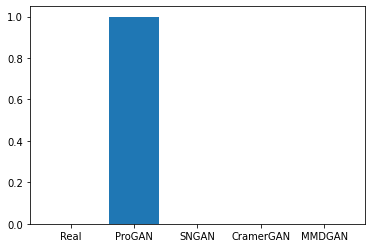

[4.60541869e-04 9.99310153e-01 3.50278187e-06 1.88257128e-04
 3.75455429e-05]


In [0]:
vis_dirpath = '/content/out_classifiervisnet/'
vis_imgName = 'ProGAN_00000000.png'
classes = GetClassificationData() 
VisualiseFingerprintData(vis_dirpath, vis_imgName, classes)

## Generate and Test Implementation

Params

In [0]:
!mkdir /content/gen_imgs/
!mkdir /content/gen_fingerprints/

In [0]:
Generate_Path = '/content/gen_imgs/'
Generate_Fingerprints_Path = '/content/gen_fingerprints/'

# Real
Real_Imgs_Path = '/content/drive/My Drive/DIP Project/RealDataset/'
n_Real = 50

# ProGAN
seed_ProGAN = 1
n_ProGAN = 50

# SNGAN
seed_SNGAN = 1
n_SNGAN = 50

Generate Images

In [0]:
# Real Images
# Choose n random images from real dataset
img_paths = []
for fname in os.listdir(Real_Imgs_Path):
    fpath = os.path.join(Real_Imgs_Path, fname)
    if os.path.splitext(fpath)[1] in ['.png', '.jpg', '.jpeg', '.bmp']:
        img_paths.append(fpath)
selected_imgs = random.sample(img_paths, n_Real)
# Copy those files to Generate_Path
for img in selected_imgs:
    shutil.copy(img, Generate_Path)

In [20]:
!pip install tensorflow==1.15.3
!pip install tensorflow-gpu==1.15.3

  Using cached https://files.pythonhosted.org/packages/02/36/9a02e27f0ec248b676a380ffe910c1858e3af3027c0d4d513dd0b56a5613/tensorflow-1.15.3-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1e/e9/d3d747a97f7188f48aa5eda486907f3b345cd409f0a0850468ba867db246/tensorboard-1.15.0-py3-none-any.whl
ERROR: tensorflow-gpu 1.12.3 has requirement tensorboard<1.13.0,>=1.12.0, but you'll have tensorboard 1.15.0 which is incompatible.
  Found existing installation: tensorboard 1.12.2
    Uninstalling tensorboard-1.12.2:
      Successfully uninstalled tensorboard-1.12.2
  Found existing installation: tensorflow 1.12.3
    Uninstalling tensorflow-1.12.3:
      Successfully uninstalled tensorflow-1.12.3
  Using cached https://files.pythonhosted.org/packages/98/ab/19aba3629427c2d96790f73838639136ce02b6e7e1c4f2dd60149174c794/tensorflow_gpu-1.15.3-cp36-cp36m-manylinux2010_x86_64.whl
  Found existing installation: tensorflow-gpu 1.12.3
    Uninstalling tensorflow-gp

In [16]:
ProGANGenerate(Generate_Path, n_ProGAN, seed_ProGAN)

python /content/drive/"My Drive"/"DIP Project"/ProGAN/run.py --app "gen" --model_path "/content/drive/My Drive/DIP Project/ProGAN/models/celeba_align_png_cropped.pkl" --out_image_dir "/content/gen_imgs/" --num_pngs 50 --gen_seed 1


In [17]:
!pip install tensorflow==1.12.3
!pip install tensorflow-gpu==1.12.3

     |████████████████████████████████| 83.1MB 50kB/s 
     |████████████████████████████████| 3.1MB 42.2MB/s 
ERROR: tensorflow-gpu 1.15.3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.12.2 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.3
    Uninstalling tensorflow-1.15.3:
      Successfully uninstalled tensorflow-1.15.3
     |████████████████████████████████| 127.8MB 108kB/s 
  Found existing installation: tensorflow-gpu 1.15.3
    Uninstalling tensorflow-gpu-1.15.3:
      Successfully uninstalled tensorflow-gpu-1.15.3


In [18]:
SNGANGenerate(Generate_Path, n_SNGAN, seed_SNGAN)

python /content/drive/"My Drive"/"DIP Project"/SNGAN/evaluations/gen_images.py --config_path "/content/drive/My Drive/DIP Project/SNGAN/configs/sn_projection_celeba.yml" --snapshot "/content/drive/My Drive/DIP Project/SNGAN/models/celeba_align_png_cropped.npz" --results_dir "/content/gen_imgs/" --num_pngs 50 --seed 1


Visualise Test Dataset

SNGAN_00000003.png


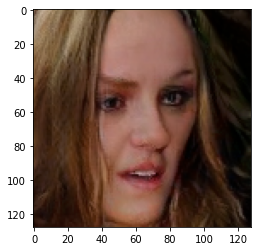

000035.jpg


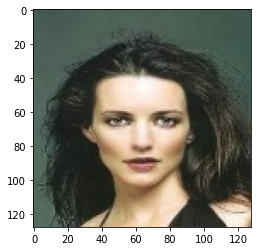

SNGAN_00000004.png


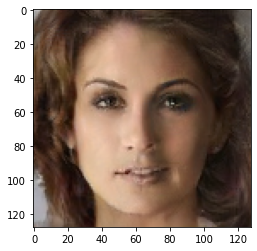

SNGAN_00000002.png


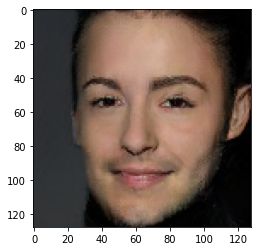

SNGAN_00000000.png


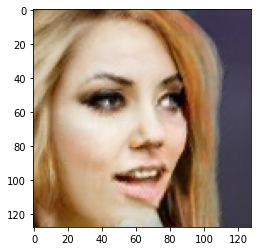

ProGAN_00000000.png


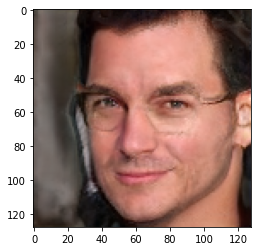

000022.jpg


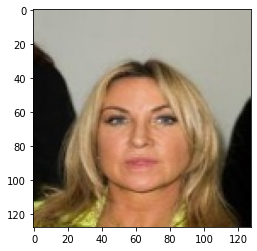

000015.jpg


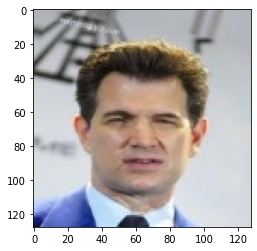

000024.jpg


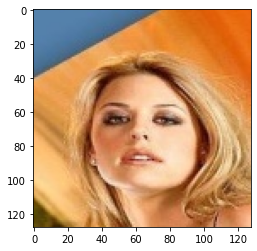

ProGAN_00000001.png


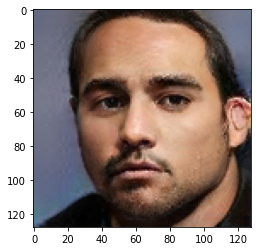

ProGAN_00000004.png


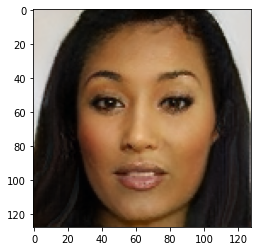

SNGAN_00000001.png


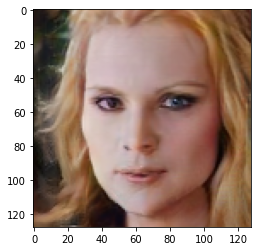

ProGAN_00000003.png


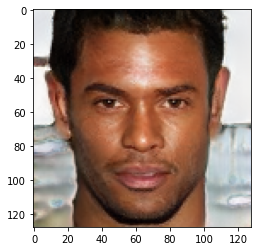

000028.jpg


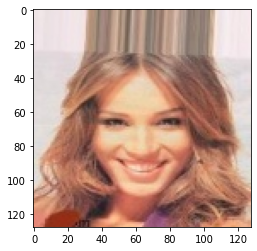

ProGAN_00000002.png


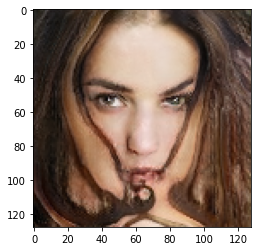

In [0]:
PlotImgsInDir(Generate_Path)

Classify Images

In [21]:
ClassifierVisNet(Generate_Path, Generate_Fingerprints_Path, exe=True)

python /content/drive/"My Drive"/"DIP Project"/classifier_visNet/run.py --app test --model_path "/content/drive/My Drive/DIP Project/classifier_visNet/models/CelebA_ProGAN_SNGAN_CramerGAN_MMDGAN_128.pkl" --testing_data_path "/content/gen_imgs/" --out_fingerprint_dir "/content/gen_fingerprints/"


Visualise Results

In [0]:
def VisualiseResults(Generate_Path, Generate_Fingerprints_Path, plot=True):
    Correct_Matches = 0
    N_Images = 0

    classes = GetClassificationData()
    Target_Classes = GetTargetClasses(Generate_Path)

    for fname in os.listdir(Generate_Path):
        fpath = os.path.join(Generate_Path, fname)
        if os.path.splitext(fpath)[1] in ['.png', '.jpg', '.jpeg', '.bmp']:
            vis_imgName = fname
            pred_class = VisualiseFingerprintData(Generate_Fingerprints_Path, vis_imgName, classes, plot=plot)
            target_class = Target_Classes[fname]
            if plot:
                print("Target Class:", target_class)
                print('\n\n')
            N_Images += 1
            if target_class.lower() in pred_class.lower():
                Correct_Matches += 1

    # Accuracy
    Accuracy = 1.0
    if N_Images > 0:
        Accuracy = Correct_Matches / N_Images
        print("Accuracy:", Accuracy)
        print("Correct Predictions:", str(Correct_Matches), "/", str(N_Images))

In [23]:
VisualiseResults(Generate_Path, Generate_Fingerprints_Path, plot=False)

SNGAN_00000047.png
000023.jpg
ProGAN_00000027.png
000043.jpg
SNGAN_00000003.png
ProGAN_00000043.png
SNGAN_00000039.png
000048.jpg
000035.jpg
SNGAN_00000041.png
ProGAN_00000042.png
ProGAN_00000048.png
ProGAN_00000020.png
SNGAN_00000044.png
SNGAN_00000036.png
SNGAN_00000020.png
000038.jpg
ProGAN_00000030.png
SNGAN_00000022.png
SNGAN_00000042.png
000019.jpg
ProGAN_00000012.png
SNGAN_00000004.png
ProGAN_00000041.png
ProGAN_00000015.png
ProGAN_00000045.png
000034.jpg
ProGAN_00000029.png
SNGAN_00000002.png
000014.jpg
ProGAN_00000046.png
ProGAN_00000037.png
SNGAN_00000007.png
SNGAN_00000000.png
ProGAN_00000016.png
ProGAN_00000035.png
SNGAN_00000013.png
ProGAN_00000038.png
000006.jpg
000002.jpg
000025.jpg
ProGAN_00000026.png
000042.jpg
000020.jpg
000012.jpg
000008.jpg
SNGAN_00000018.png
SNGAN_00000048.png
SNGAN_00000029.png
000032.jpg
000005.jpg
SNGAN_00000012.png
000047.jpg
000030.jpg
SNGAN_00000023.png
ProGAN_00000011.png
SNGAN_00000033.png
000033.jpg
000011.jpg
ProGAN_00000000.png
000022.jp

## Improvement

### Statistical Improvement using Image Augmentation

In this method, we augment the input image into a number of images while not disrupting the fingerprint much.

Then we classify all the generated images and assign the most probable category.

#### Generate Augmented Images

In [0]:
import cv2
import random
import numpy as np

In [0]:
def brightness(img, low, high):
    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

def horizontal_flip(img, flag):
    if flag:
        return cv2.flip(img, 1)
    else:
        return img

def vertical_flip(img, flag):
    if flag:
        return cv2.flip(img, 0)
    else:
        return img

def rotation(img, angle):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img

In [0]:
# Augmentation Algo
def GenerateAugmentedImages(src, dst, n, plot=True):
    fname = os.path.basename(src)
    fname_split = os.path.splitext(fname)

    I = cv2.imread(src)
    I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

    if plot:
        plt.imshow(I)
        plt.show()

    # Augment
    angleRange = (10, 30)
    angles = [90, 180, 270]
    for i in range(len(angles)):
        # I_aug = brightness(I, 0.5, 1.5)
        # I_aug = rotation(I, (i/n)*(angleRange[1] - angleRange[0]) + angleRange[0])
        I_aug = rotation(I, angles[i])

        if plot:
            plt.imshow(I_aug)
            plt.show()

        cv2.imwrite(dst + fname_split[0] + "_" + str(i) + fname_split[1], I_aug)
        del I_aug

    # Flip
    # Horizontal
    # I_aug = horizontal_flip(I, True)

    # if plot:
    #     plt.imshow(I_aug)
    #     plt.show()

    # cv2.imwrite(dst + fname_split[0] + "_" + "horflip" + fname_split[1], I_aug)

    # Vertical
    I_aug = vertical_flip(I, True)

    if plot:
        plt.imshow(I_aug)
        plt.show()

    cv2.imwrite(dst + fname_split[0] + "_" + "vertflip" + fname_split[1], I_aug)

In [0]:
# !mkdir /content/aug_imgs/
# !mkdir /content/AugFingerprints/

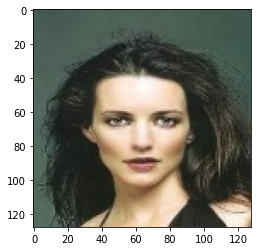

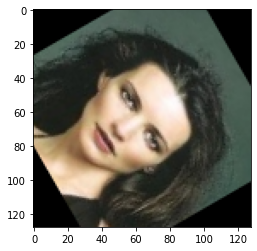

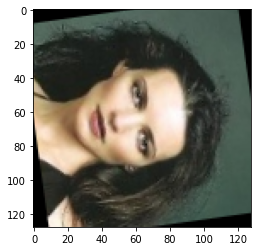

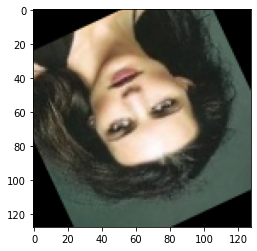

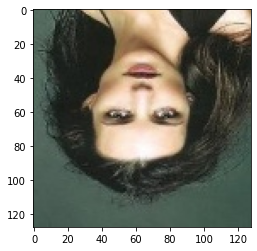

In [0]:
input_img_path = '/content/gen_imgs/000035.jpg'
aug_dir = '/content/aug_imgs/'
out_fingerprint_path = '/content/AugFingerprints/'
n_augmentations = 5

GenerateAugmentedImages(input_img_path, aug_dir, n_augmentations, plot=True)

#### Classify for all Augmented Images

In [0]:
# Classify
classes = ClassifierVisNet(aug_dir, out_fingerprint_path)

# Find Most Freq Class
class_count = {}
for c in classes:
    if c.best_class in class_count.keys():
        class_count[c.best_class] += 1
    else:
        class_count[c.best_class] = 1

maxKey = ''
maxCount = -1
for ck in class_count.keys():
    if maxCount < class_count[ck]:
        maxCount = class_count[ck]
        maxKey = ck
    
best_class = maxKey
print("Class Counts:\n", class_count.items())
print("\n")
print("Best Class:", best_class)

python /content/drive/"My Drive"/"DIP Project"/classifier_visNet/run.py --app test --model_path "/content/drive/My Drive/DIP Project/classifier_visNet/models/CelebA_ProGAN_SNGAN_CramerGAN_MMDGAN_128.pkl" --testing_data_path "/content/aug_imgs/" --out_fingerprint_dir "/content/AugFingerprints/"
Class Counts:
 dict_items([('CelebA_real_data', 4)])


Best Class: CelebA_real_data


Visualise

000035_1.jpg


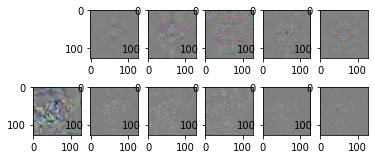

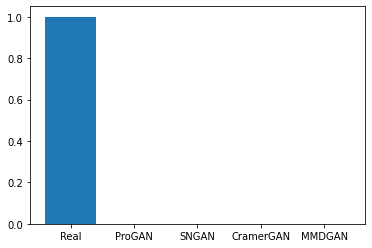

[9.99965915e-01 4.16764893e-06 2.69892023e-05 2.75339769e-06
 1.74974063e-07]
Best Class: CelebA_real_data
Target Class: Real



000035_0.jpg


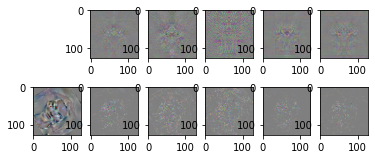

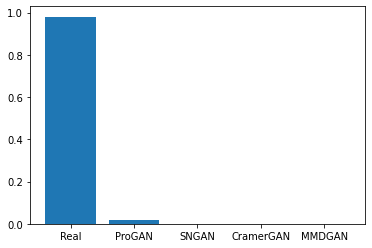

[9.80332315e-01 1.94313611e-02 3.72344344e-05 3.17118488e-05
 1.67377391e-04]
Best Class: CelebA_real_data
Target Class: Real



000035_2.jpg


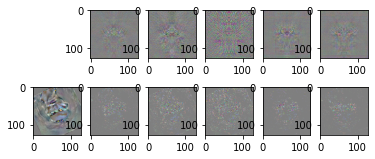

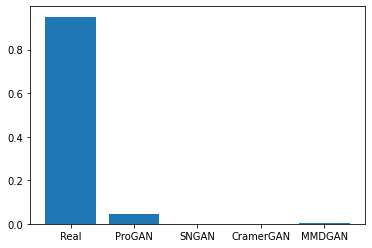

[9.50788203e-01 4.37224119e-02 1.33744761e-03 6.00186240e-04
 3.55175102e-03]
Best Class: CelebA_real_data
Target Class: Real



000035_vertflip.jpg


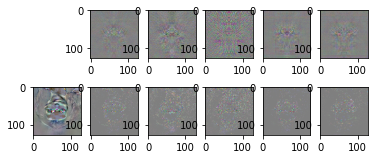

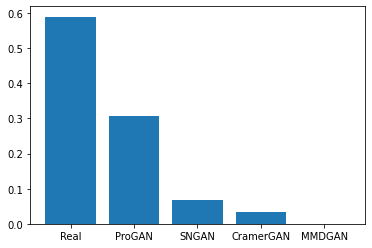

[0.58955525 0.3065988  0.06866632 0.03448874 0.0006909 ]
Best Class: CelebA_real_data
Target Class: Real



Accuracy: 1.0
Correct Predictions: 4 / 4


In [0]:
VisualiseResults(aug_dir, out_fingerprint_path)